In [167]:
from matplotlib import pyplot as plt
from pandas import read_csv
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

In [168]:
class LogEntry:
    def __init__(self, save,dataset, lr,epoch,type,iters, time, loss, epe, e3p,test_time,test_loss,test_epe,test_e3p):
        self.save = save
        self.dataset = dataset
        self.lr = float(lr)
        self.epoch = int(epoch)
        self.type = type
        self.iters = int(iters)
        self.time = float(time)
        self.loss = float(loss)
        self.epe = float(epe)
        self.e3p = float(e3p)
        self.test_time = float(test_time)
        self.test_loss = float(test_loss)
        self.test_epe = float(test_epe)
        self.test_e3p = float(test_e3p)

    def __repr__(self):
        return f"{self.type},{self.time},{self.loss},{self.epe},{self.e3p}"

    def __str__(self):
        return self.__repr__()
    @property
    def isEpoch(self):
        return self.type == "epoch"

In [169]:
    
filename = "/home/barny/data/logs/nosdea-sceneflow-1-2.log"
with open(filename) as f:
    data = f.read().split("\n")
    data = [x for x in data if x]
    data = [x.split(",") for x in data[200:]]
    data = [LogEntry(*x) for x in data]

In [170]:
iters = [d for d in data if not d.isEpoch][200:]

In [171]:
data = read_csv(filename,header=None)
data.columns = ["save","dataset", "lr","epoch","type","iters", "time", "loss", "epe", "e3p","test_time","test_loss","test_epe","test_e3p"]
series = data[data["type"] == "iter"]
series = series[series["epoch"]>=0]
window_size = 25
series

,save,dataset,lr,epoch,type,iters,time,loss,epe,e3p,test_time,test_loss,test_epe,test_e3p
0,nosdea-sceneflow-1-2,sceneflow,0.001,0,iter,25,18.732117,3.993265,1.920514,0.078677,-1,-1,-1,-1
1,nosdea-sceneflow-1-2,sceneflow,0.001,0,iter,25,17.316894,3.525326,1.717763,0.064357,-1,-1,-1,-1
2,nosdea-sceneflow-1-2,sceneflow,0.001,0,iter,25,17.175431,3.587150,1.800899,0.073437,-1,-1,-1,-1
3,nosdea-sceneflow-1-2,sceneflow,0.001,0,iter,25,16.774397,3.614476,1.727719,0.063383,-1,-1,-1,-1
4,nosdea-sceneflow-1-2,sceneflow,0.001,0,iter,25,16.519616,3.820159,1.844577,0.073892,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,nosdea-sceneflow-1-2,sceneflow,0.001,0,iter,25,16.305927,4.012087,1.882107,0.074850,-1,-1,-1,-1
291,nosdea-sceneflow-1-2,sceneflow,0.001,0,iter,25,16.170891,3.592182,1.693894,0.064104,-1,-1,-1,-1
292,nosdea-sceneflow-1-2,sceneflow,0.001,0,iter,25,17.530270,3.805574,1.838861,0.079192,-1,-1,-1,-1
293,nosdea-sceneflow-1-2,sceneflow,0.001,0,iter,25,17.039882,2.752924,1.402577,0.056640,-1,-1,-1,-1


In [172]:
linear_regressor = LinearRegression()
linear_regressor.fit(np.array(series.index).reshape(-1,1),series["loss"])
Y_pred = linear_regressor.predict(np.array(series.index).reshape(-1,1))

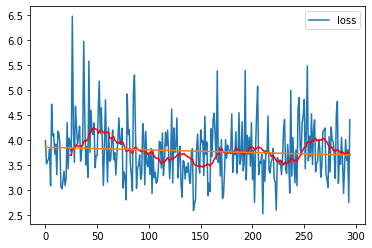

In [173]:
rolling = series["loss"].rolling(window=window_size)
rolling_mean = rolling.mean()
series.plot(y="loss")
rolling_mean.plot(y="loss",color="red")
plt.plot(np.array(series.index).reshape(-1,1),Y_pred)
plt.show()

In [174]:
pf = PolynomialFeatures

In [175]:
linear_regressor = LinearRegression()
linear_regressor.fit(np.array(series.index).reshape(-1,1),series["epe"])
Y_pred = linear_regressor.predict(np.array(series.index).reshape(-1,1))

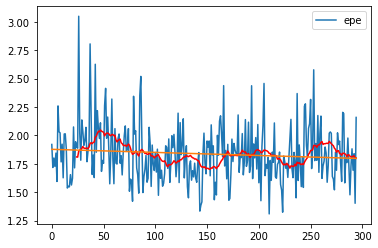

In [176]:
rolling = series["epe"].rolling(window=window_size)
rolling_mean = rolling.mean()
series.plot(y="epe")
rolling_mean.plot(y="epe",color="red")
plt.plot(np.array(series.index).reshape(-1,1),Y_pred)
plt.show()

In [177]:
linear_regressor = LinearRegression()
linear_regressor.fit(np.array(series.index).reshape(-1,1),series["e3p"])
Y_pred = linear_regressor.predict(np.array(series.index).reshape(-1,1))

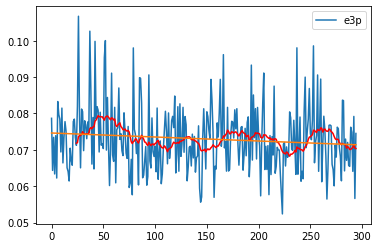

In [178]:
linear_regressor = LinearRegression()
linear_regressor.fit(np.array(series.index).reshape(-1,1),series["e3p"])
Y_pred = linear_regressor.predict(np.array(series.index).reshape(-1,1))
rolling = series["e3p"].rolling(window=window_size)
rolling_mean = rolling.mean()
series.plot(y="e3p")
rolling_mean.plot(y="e3p",color="red")
plt.plot(np.array(series.index).reshape(-1,1),Y_pred)
plt.show()

In [179]:
epochs = data[data["type"] == "epoch"]
epochs

,save,dataset,lr,epoch,type,iters,time,loss,epe,e3p,test_time,test_loss,test_epe,test_e3p


<AxesSubplot:>

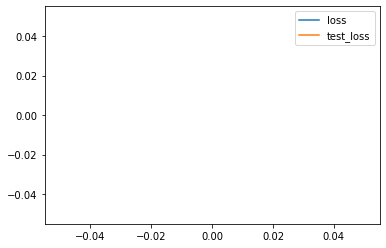

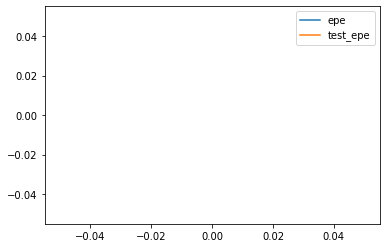

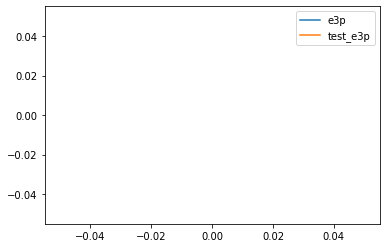

In [180]:
epochs.plot(y=["loss","test_loss"])
epochs.plot(y=["epe","test_epe"])
epochs.plot(y=["e3p","test_e3p"])